In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df=pd.read_csv( "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     30

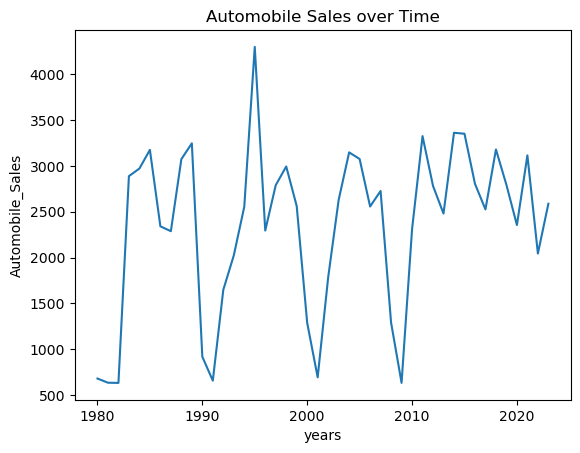

In [20]:
sales_years=df.groupby(['Year'])['Automobile_Sales'].mean()
sales_years.plot(x=sales_years.index, y=sales_years.values, kind='line')
plt.xlabel('years')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales over Time')
plt.show()

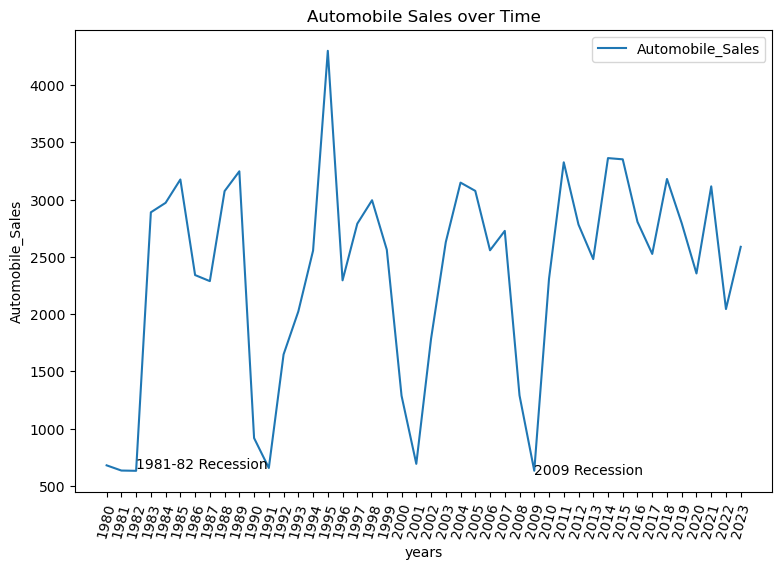

In [45]:
plt.figure(figsize=(9, 6))

sales_years=df.groupby(['Year'])['Automobile_Sales'].mean()
sales_years.plot(x=sales_years.index, y=sales_years.values, kind='line')
plt.xlabel('years')
plt.ylabel('Automobile_Sales')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 595 , '2009 Recession')
plt.legend()
plt.title('Automobile Sales over Time')
plt.show()  
   


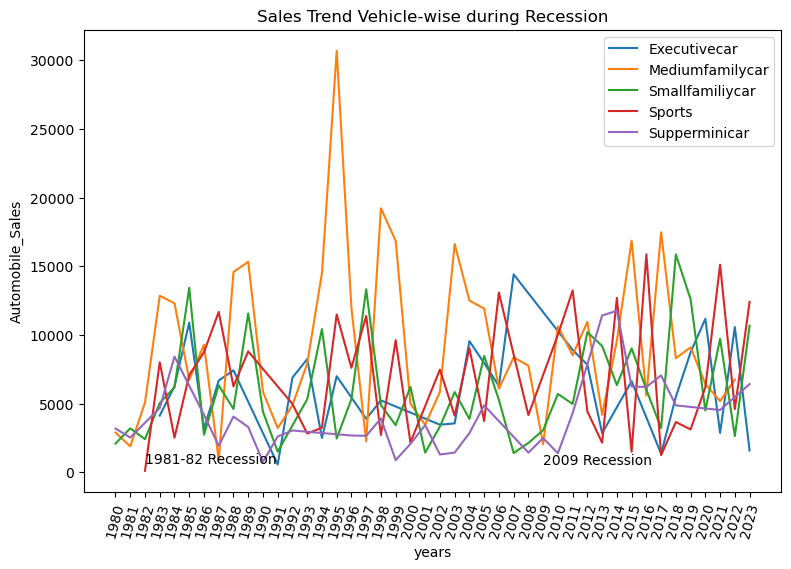

In [46]:
plt.figure(figsize=(9, 6))
df_recession = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_recession.set_index('Year', inplace=True)
df_recession = df_recession.groupby(['Vehicle_Type'])['Automobile_Sales']
df_recession.plot(kind='line')
plt.xlabel('years')
plt.ylabel('Automobile_Sales')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 595 , '2009 Recession')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

In [42]:
dff=df[df['Recession']==1]
dff

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


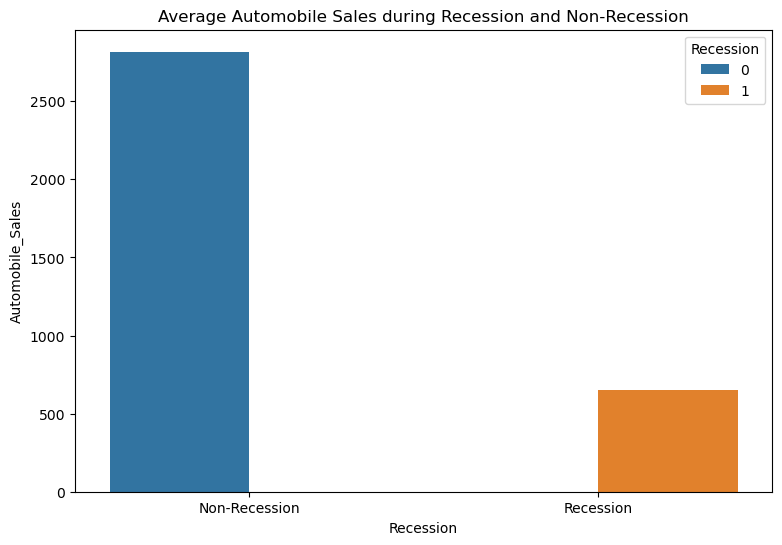

In [55]:
plt.figure(figsize=(9, 6))
recession_sales=df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=recession_sales)
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

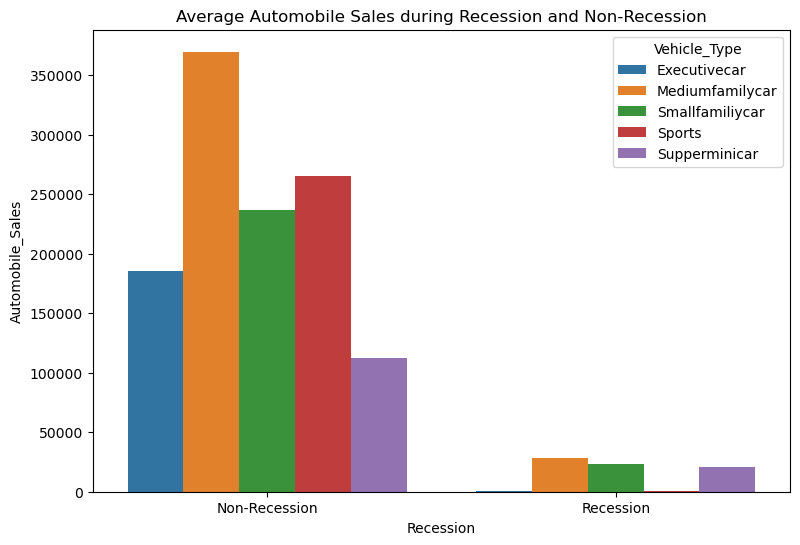

In [57]:
plt.figure(figsize=(9, 6))
recession_sales=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=recession_sales)
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

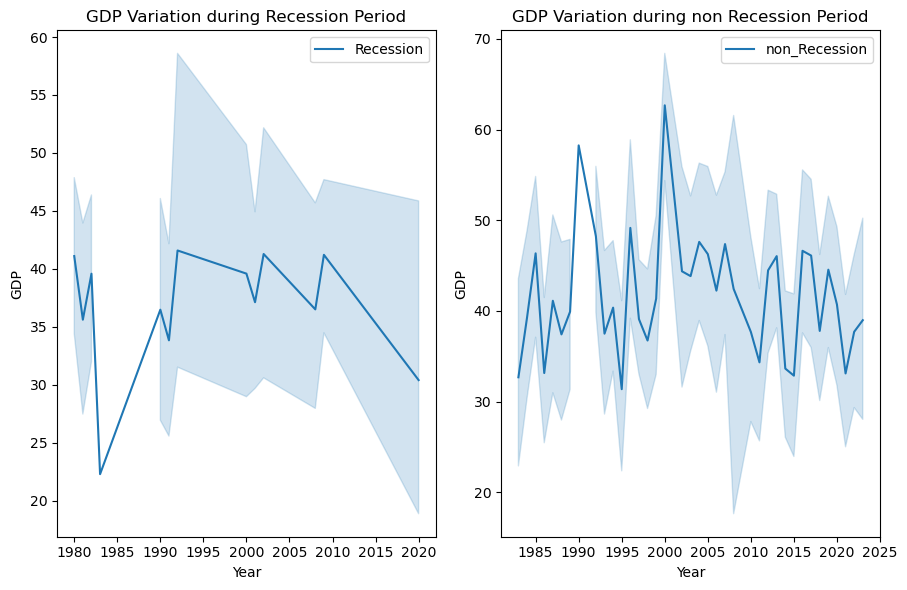

In [63]:
figure=plt.figure(figsize=(9, 6))

dfr=df[df['Recession']==1]
df0=df[df['Recession']==0]

fig1=figure.add_subplot(1,2,1)
fig2=figure.add_subplot(1,2,2)

sns.lineplot(x='Year', y='GDP',data=dfr, label='Recession', ax=fig1)
fig1.set_xlabel('Year')
fig1.set_ylabel('GDP')
fig1.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP',data=df0, label='non_Recession', ax=fig2)
fig2.set_xlabel('Year')
fig2.set_ylabel('GDP')
fig2.set_title('GDP Variation during non Recession Period')
plt.tight_layout()
plt.show()

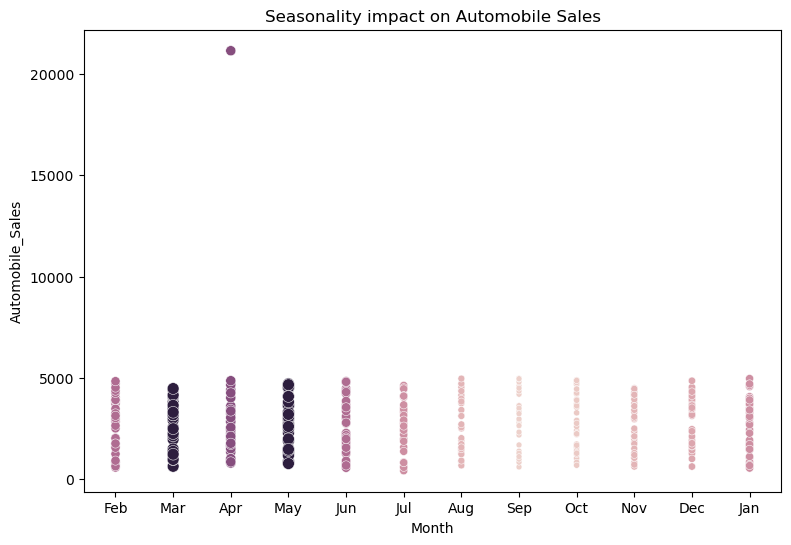

In [67]:
plt.figure(figsize=(9, 6))
df0=df[df['Recession']==0]
sns.scatterplot(x='Month', y='Automobile_Sales', size='Seasonality_Weight', hue='Seasonality_Weight', legend=False, data=df0)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

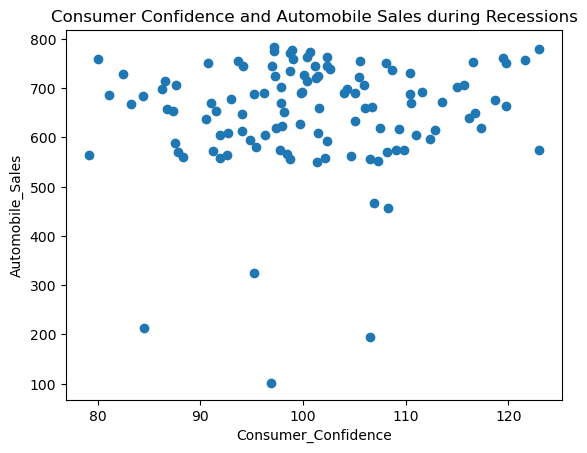

In [70]:
dfr=df[df['Recession']==1]
plt.scatter(x='Consumer_Confidence', y='Automobile_Sales', data=dfr)
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

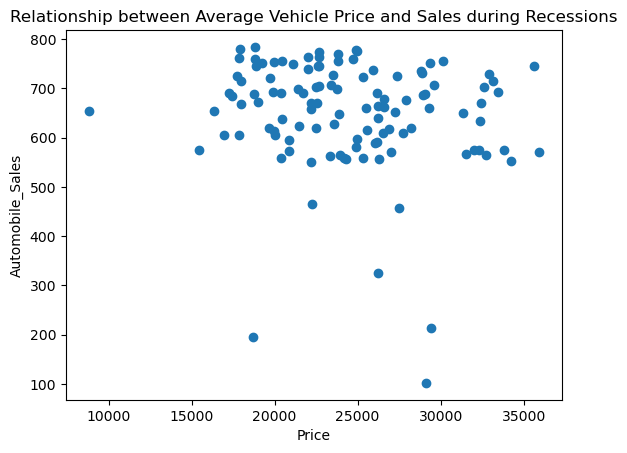

In [71]:
dfr = df[df['Recession'] == 1]
plt.scatter(x='Price', y='Automobile_Sales', data=dfr)   
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

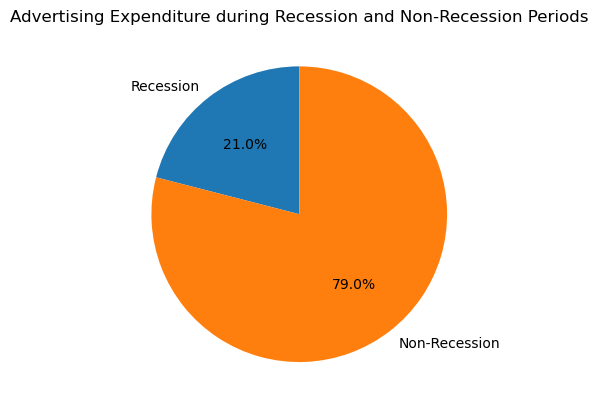

In [14]:

dfr=df[df['Recession']==1]
df0=df[df['Recession']==0]

dfr_adv=dfr['Advertising_Expenditure'].sum()
df0_adv=df0['Advertising_Expenditure'].sum()

sizes=[dfr_adv,df0_adv]
labels=['Recession', 'Non-Recession']
plt.pie(sizes , labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()


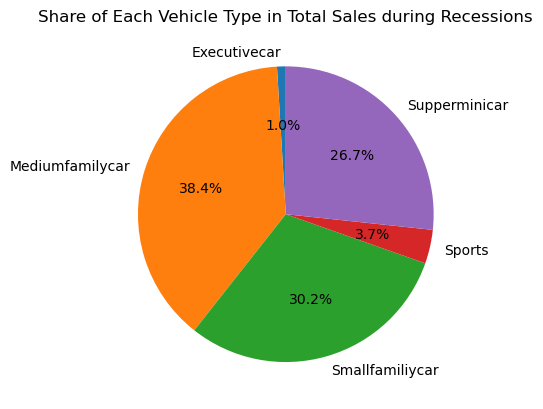

In [17]:

dfr=df[df['Recession']==1]
type_adv=dfr.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

sizes=type_adv.values
labels=type_adv.index
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%') 
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

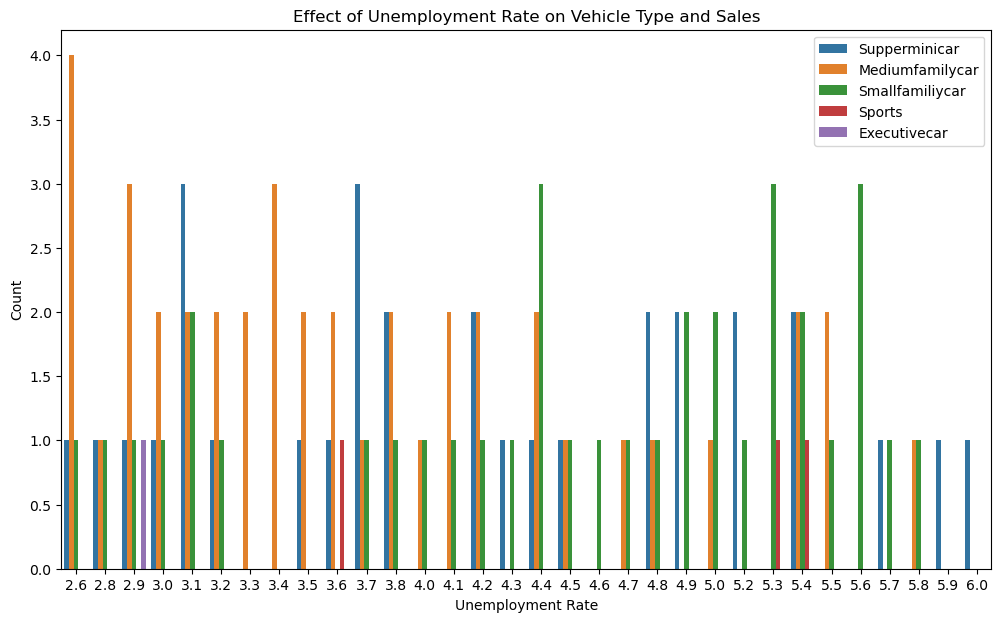

In [21]:
dfr=df[df['Recession']==1]
plt.figure(figsize=(12,7))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
sns.countplot(x='unemployment_rate', hue='Vehicle_Type', data=dfr)
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

In [25]:
from urllib.request import urlopen 

In [26]:
import json
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
response = urlopen(url)
data_json = json.loads(response.read()) 
data_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

In [51]:
df_map=pd.read_json('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json')
df_map.to_json('df_map_automobile.json')

In [60]:
import folium
dfr=df[df['Recession']==1]
sales_by_city = dfr.groupby('City')['Automobile_Sales'].sum().reset_index()

world_map=folium.Map(zoom_start=4,tile='Mapbox Bright')
#folium.geojson('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json',name='')

choropleth = folium.Choropleth(
        geo_data= data_json,  
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(world_map)
choropleth.geojson.add_child(
     folium.features.GeoJsonTooltip(['name'], labels=True)
  )

world_map